# United States Airlines Analysis

### The objective of this project is to identify the factors that contribute to avoidable flight delays.

###### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


###### Importing the datasets

In [2]:
df1=pd.read_excel('Airlines.xlsx')

In [3]:
df1.shape

(518556, 9)

In [4]:
df1.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
df2=pd.read_excel('airports.xlsx')

In [6]:
df2.shape

(73805, 18)

In [7]:
df2.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [8]:
df3=pd.read_excel('runways.xlsx')

In [9]:
df3.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [10]:
df3.shape

(43977, 20)

In [11]:
df1.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [12]:
df2.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [13]:
df3.columns

Index(['id', 'airport_ref', 'airport_ident', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_latitude_deg',
       'le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_ident', 'he_latitude_deg',
       'he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft'],
      dtype='object')

### 1. Aggregating the data

In [14]:
merged_df = pd.merge(df1, df2, on='id')

In [15]:
df = pd.merge(merged_df, df3, left_on='id', right_on='airport_ref')

In [16]:
df.shape

(42384, 46)

In [17]:
df.head(10)

,id_x,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,2,US,1558,PHX,CLT,3,15,222,1,OM11,...,54.972000,NaN,130.9,NaN,31,24.512501,54.988098,NaN,310.9,NaN
1,3,AA,2400,LAX,DFW,3,20,165,1,AGGH,...,160.044998,28.0,68.0,NaN,24,-9.424260,160.063995,14.0,248.0,NaN
2,4,AA,2466,SFO,DFW,3,20,195,1,AGGM,...,157.257004,7.0,78.9,NaN,25,-8.326760,157.268997,9.0,258.9,NaN
3,5,AS,108,ANC,SEA,3,30,202,0,AL-LA10,...,20.148899,NaN,142.0,NaN,32,40.083099,20.157301,NaN,322.0,NaN
4,7,DL,1768,LAX,MSP,3,30,220,0,UD21,...,44.556099,NaN,60.3,NaN,23,40.300701,44.566299,NaN,240.3,NaN
5,7,DL,1768,LAX,MSP,3,30,220,0,UD21,...,44.571899,NaN,186.1,NaN,36,40.289101,44.570599,NaN,6.1,NaN
6,8,DL,2722,PHX,DTW,3,30,228,0,ANYN,...,166.912003,22.0,121.0,165.0,30,-0.553739,166.925995,20.0,301.0,380.0
7,9,DL,2606,SFO,MSP,3,35,216,1,FN18,...,15.002800,NaN,95.0,NaN,28,-14.728600,15.025300,NaN,275.0,NaN
8,10,AA,2538,LAS,ORD,3,40,200,1,FN19,...,13.247600,NaN,72.0,NaN,26,-9.649030,13.273700,NaN,252.0,NaN
9,11,CO,223,ANC,SEA,3,49,201,1,NZ12,...,NaN,NaN,27.5,NaN,19,NaN,NaN,NaN,207.5,NaN


### 2. Finding out the passenger traffic in large and medium hubs using web scraping

In [18]:
from bs4 import BeautifulSoup
import requests

In [19]:
url = 'https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')


table_index = 0  
table = soup.find_all('table', class_='wikitable sortable')[table_index]


data = []
rows = table.find_all('tr')
for row in rows[1:]:  
    columns = row.find_all('td')
    if len(columns) >= 5:  
        airport = columns[2].text.strip()
        passenger_traffic = columns[5].text.strip()
        data.append({'Airport': airport, 'Passenger Traffic': passenger_traffic})


df_large_hubs= pd.DataFrame(data)


print(df_large_hubs)

   Airport Passenger Traffic
0      ATL        36,676,010
1      DFW        30,005,266
2      DEN        28,645,527
3      ORD        26,350,976
4      LAX        23,663,410
5      CLT        20,900,875
6      MCO        19,618,838
7      LAS        19,160,342
8      PHX        18,940,287
9      MIA        17,500,096
10     SEA        17,430,195
11     IAH        16,242,821
12     JFK        15,273,342
13     EWR        14,514,049
14     FLL        13,598,994
15     MSP        12,211,409
16     SFO        11,725,347
17     DTW        11,517,696
18     BOS        10,909,817
19     SLC        10,795,906
20     PHL         9,820,222
21     BWI         9,253,561
22     TPA         8,847,197
23     SAN         7,836,360
24     LGA         7,827,307
25     MDW         7,680,617
26     BNA         7,594,049
27     IAD         7,227,875
28     DCA         6,731,737
29     AUS         6,666,215


In [20]:
url = 'https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States'
response = requests.get(url)


soup = BeautifulSoup(response.content, 'html.parser')


table_index = 1  
table = soup.find_all('table', class_='wikitable sortable')[table_index]

data = []
rows = table.find_all('tr')
for row in rows[1:]: 
    columns = row.find_all('td')
    if len(columns) >= 5:  
        airport = columns[2].text.strip()
        passenger_traffic = columns[5].text.strip()
        data.append({'Airport': airport, 'Passenger Traffic': passenger_traffic})


df_medium_hubs= pd.DataFrame(data)


print(df_medium_hubs)

   Airport Passenger Traffic
0      DAL         6,487,563
1      HNL         5,830,928
2      PDX         5,759,879
3      HOU         5,560,780
4      RSW         5,080,805
5      STL         5,070,471
6      SMF         4,760,275
7      SJU         4,738,725
8      RDU         4,311,049
9      MSY         4,017,147
10     OAK         4,011,953
11     SNA         3,807,205
12     MCI         3,795,290
13     SAT         3,677,643
14     SJC         3,619,690
15     CLE         3,552,402
16     IND         3,487,100
17     PIT         3,069,259
18     CVG         3,050,597
19     OGG         2,933,315
20     CMH         2,825,259
21     PBI         2,567,897
22     JAX         2,425,685
23     BDL         2,273,259
24     MKE         2,231,010
25     ONT         2,201,528
26     ANC         2,184,959
27     CHS         2,015,277
28     BUR         1,942,417
29     OMA         1,829,912
30     BOI         1,809,000
31     MEM         1,793,073
32     RNO         1,781,785
33     ABQ    

### 3. Missing Value Treatment

In [21]:
df.isnull().sum()

id_x                             0
Airline                          0
Flight                           0
AirportFrom                      0
AirportTo                        0
DayOfWeek                        0
Time                             0
Length                           0
Delay                            0
ident                            0
type                             0
name                             0
latitude_deg                     0
longitude_deg                    0
elevation_ft                  1446
continent                    26216
iso_country                     32
iso_region                       0
municipality                  2186
scheduled_service                0
gps_code                      4932
iata_code                    32356
local_code                   14618
home_link                    38280
wikipedia_link               31088
keywords                     32779
id_y                             0
airport_ref                      0
airport_ident       

###### Dropping the columns which have really high missing values

In [22]:
threshold = len(df) * 0.5

In [23]:
df = df.dropna(thresh=threshold, axis=1)

In [24]:
df.isnull().sum()

id_x                     0
Airline                  0
Flight                   0
AirportFrom              0
AirportTo                0
DayOfWeek                0
Time                     0
Length                   0
Delay                    0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft          1446
iso_country             32
iso_region               0
municipality          2186
scheduled_service        0
gps_code              4932
local_code           14618
id_y                     0
airport_ref              0
airport_ident            0
length_ft              217
width_ft              2783
surface                442
lighted                  0
closed                   0
le_ident               176
he_ident              6378
dtype: int64

###### We still have a few more columns that can be dropped

In [25]:
columns_to_drop = ['gps_code', 'local_code', 'he_ident']

In [26]:
df = df.drop(columns_to_drop, axis=1)

###### From the remaining data we can drop the rows that are missing values

In [27]:
df=df.dropna()

In [28]:
df.shape

(38072, 28)

In [29]:
df.head(10)

,id_x,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,scheduled_service,id_y,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident
0,2,US,1558,PHX,CLT,3,15,222,1,OM11,...,no,232775,2,OM11,7080.0,200.0,ASP,0,0,13
1,3,AA,2400,LAX,DFW,3,20,165,1,AGGH,...,yes,233754,3,AGGH,7218.0,148.0,ASP,1,0,6
2,4,AA,2466,SFO,DFW,3,20,195,1,AGGM,...,yes,233755,4,AGGM,4593.0,98.0,ASP,0,0,7
3,5,AS,108,ANC,SEA,3,30,202,0,AL-LA10,...,no,232874,5,AL-LA10,3855.0,228.0,GRS,0,0,14
4,7,DL,1768,LAX,MSP,3,30,220,0,UD21,...,no,232877,7,UD21,3281.0,250.0,CON,0,0,5
5,7,DL,1768,LAX,MSP,3,30,220,0,UD21,...,no,232878,7,UD21,3252.0,250.0,CON,0,0,18
6,8,DL,2722,PHX,DTW,3,30,228,0,ANYN,...,yes,237996,8,ANYN,7054.0,148.0,ASP,1,0,12
7,9,DL,2606,SFO,MSP,3,35,216,1,FN18,...,no,232902,9,FN18,8015.0,98.0,ASP,0,0,10
8,10,AA,2538,LAS,ORD,3,40,200,1,FN19,...,no,232903,10,FN19,9830.0,148.0,ASP,0,0,8
9,11,CO,223,ANC,SEA,3,49,201,1,NZ12,...,no,233600,11,NZ12,2500.0,100.0,SNO,0,0,1


### 4. Visualize the delays of Southwest Airlines to compare it with the data of other airlines.

In [30]:
southwest_flights = df[df['Airline'] == 'WN']

In [31]:
southwest_delay_percentage = (southwest_flights['Delay'] == 1).mean() * 100

In [32]:
southwest_delay_percentage

60.07168458781362

In [33]:
other_airlines_delay_percentages = (df[df['Airline'] != 'WN']['Delay'] == 1).mean() * 100

In [34]:
other_airlines_delay_percentages

32.99996784255716

In [35]:
data = pd.DataFrame({
    'Airline': ['Southwest (WN)', 'Other Airlines'],
    'Delay Percentage': [southwest_delay_percentage, other_airlines_delay_percentages]
})

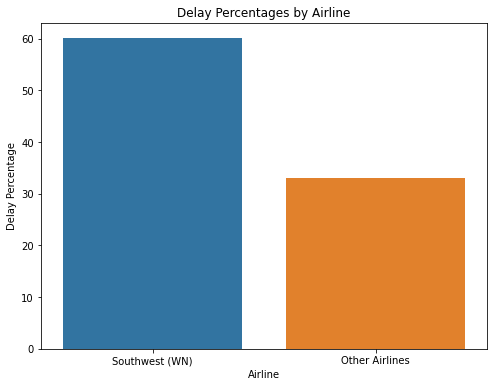

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Airline', y='Delay Percentage', data=data)
plt.title('Delay Percentages by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Percentage')
plt.show()

### 5. Finding out the delays on different days of the week

In [37]:
delay_percentages = df.groupby('DayOfWeek')['Delay'].mean() * 100

In [38]:
delay_percentages_sorted = delay_percentages.sort_values()

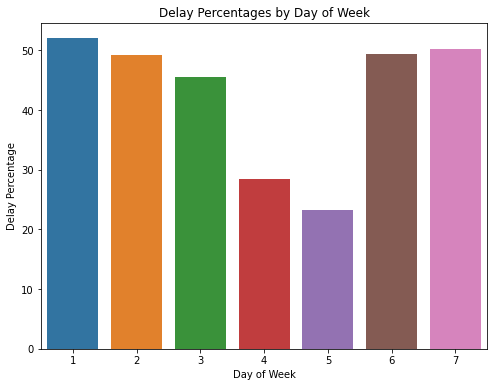

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x=delay_percentages_sorted.index, y=delay_percentages_sorted.values)
plt.title('Delay Percentages by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Delay Percentage')
plt.show()

### 6. Finding out delays based on travel duration

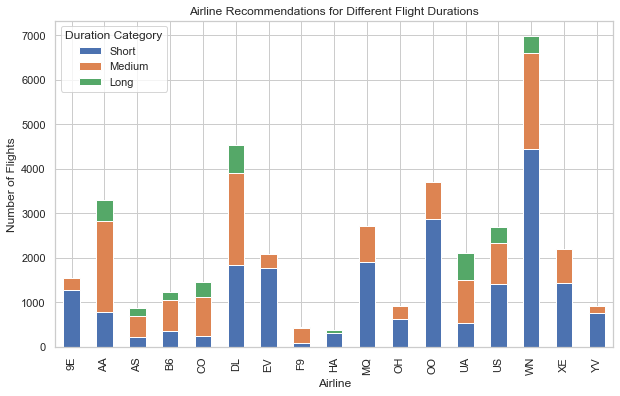

In [40]:
short_duration_threshold = 120  
medium_duration_threshold = 240  

df['DurationCategory'] = pd.cut(df['Length'], bins=[0, short_duration_threshold, medium_duration_threshold, df['Length'].max()],
                                labels=['Short', 'Medium', 'Long'])


airline_duration_counts = df.groupby(['Airline', 'DurationCategory']).size().unstack()


sns.set(style="whitegrid")
airline_duration_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.title('Airline Recommendations for Different Flight Durations')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.legend(title='Duration Category')

plt.show()

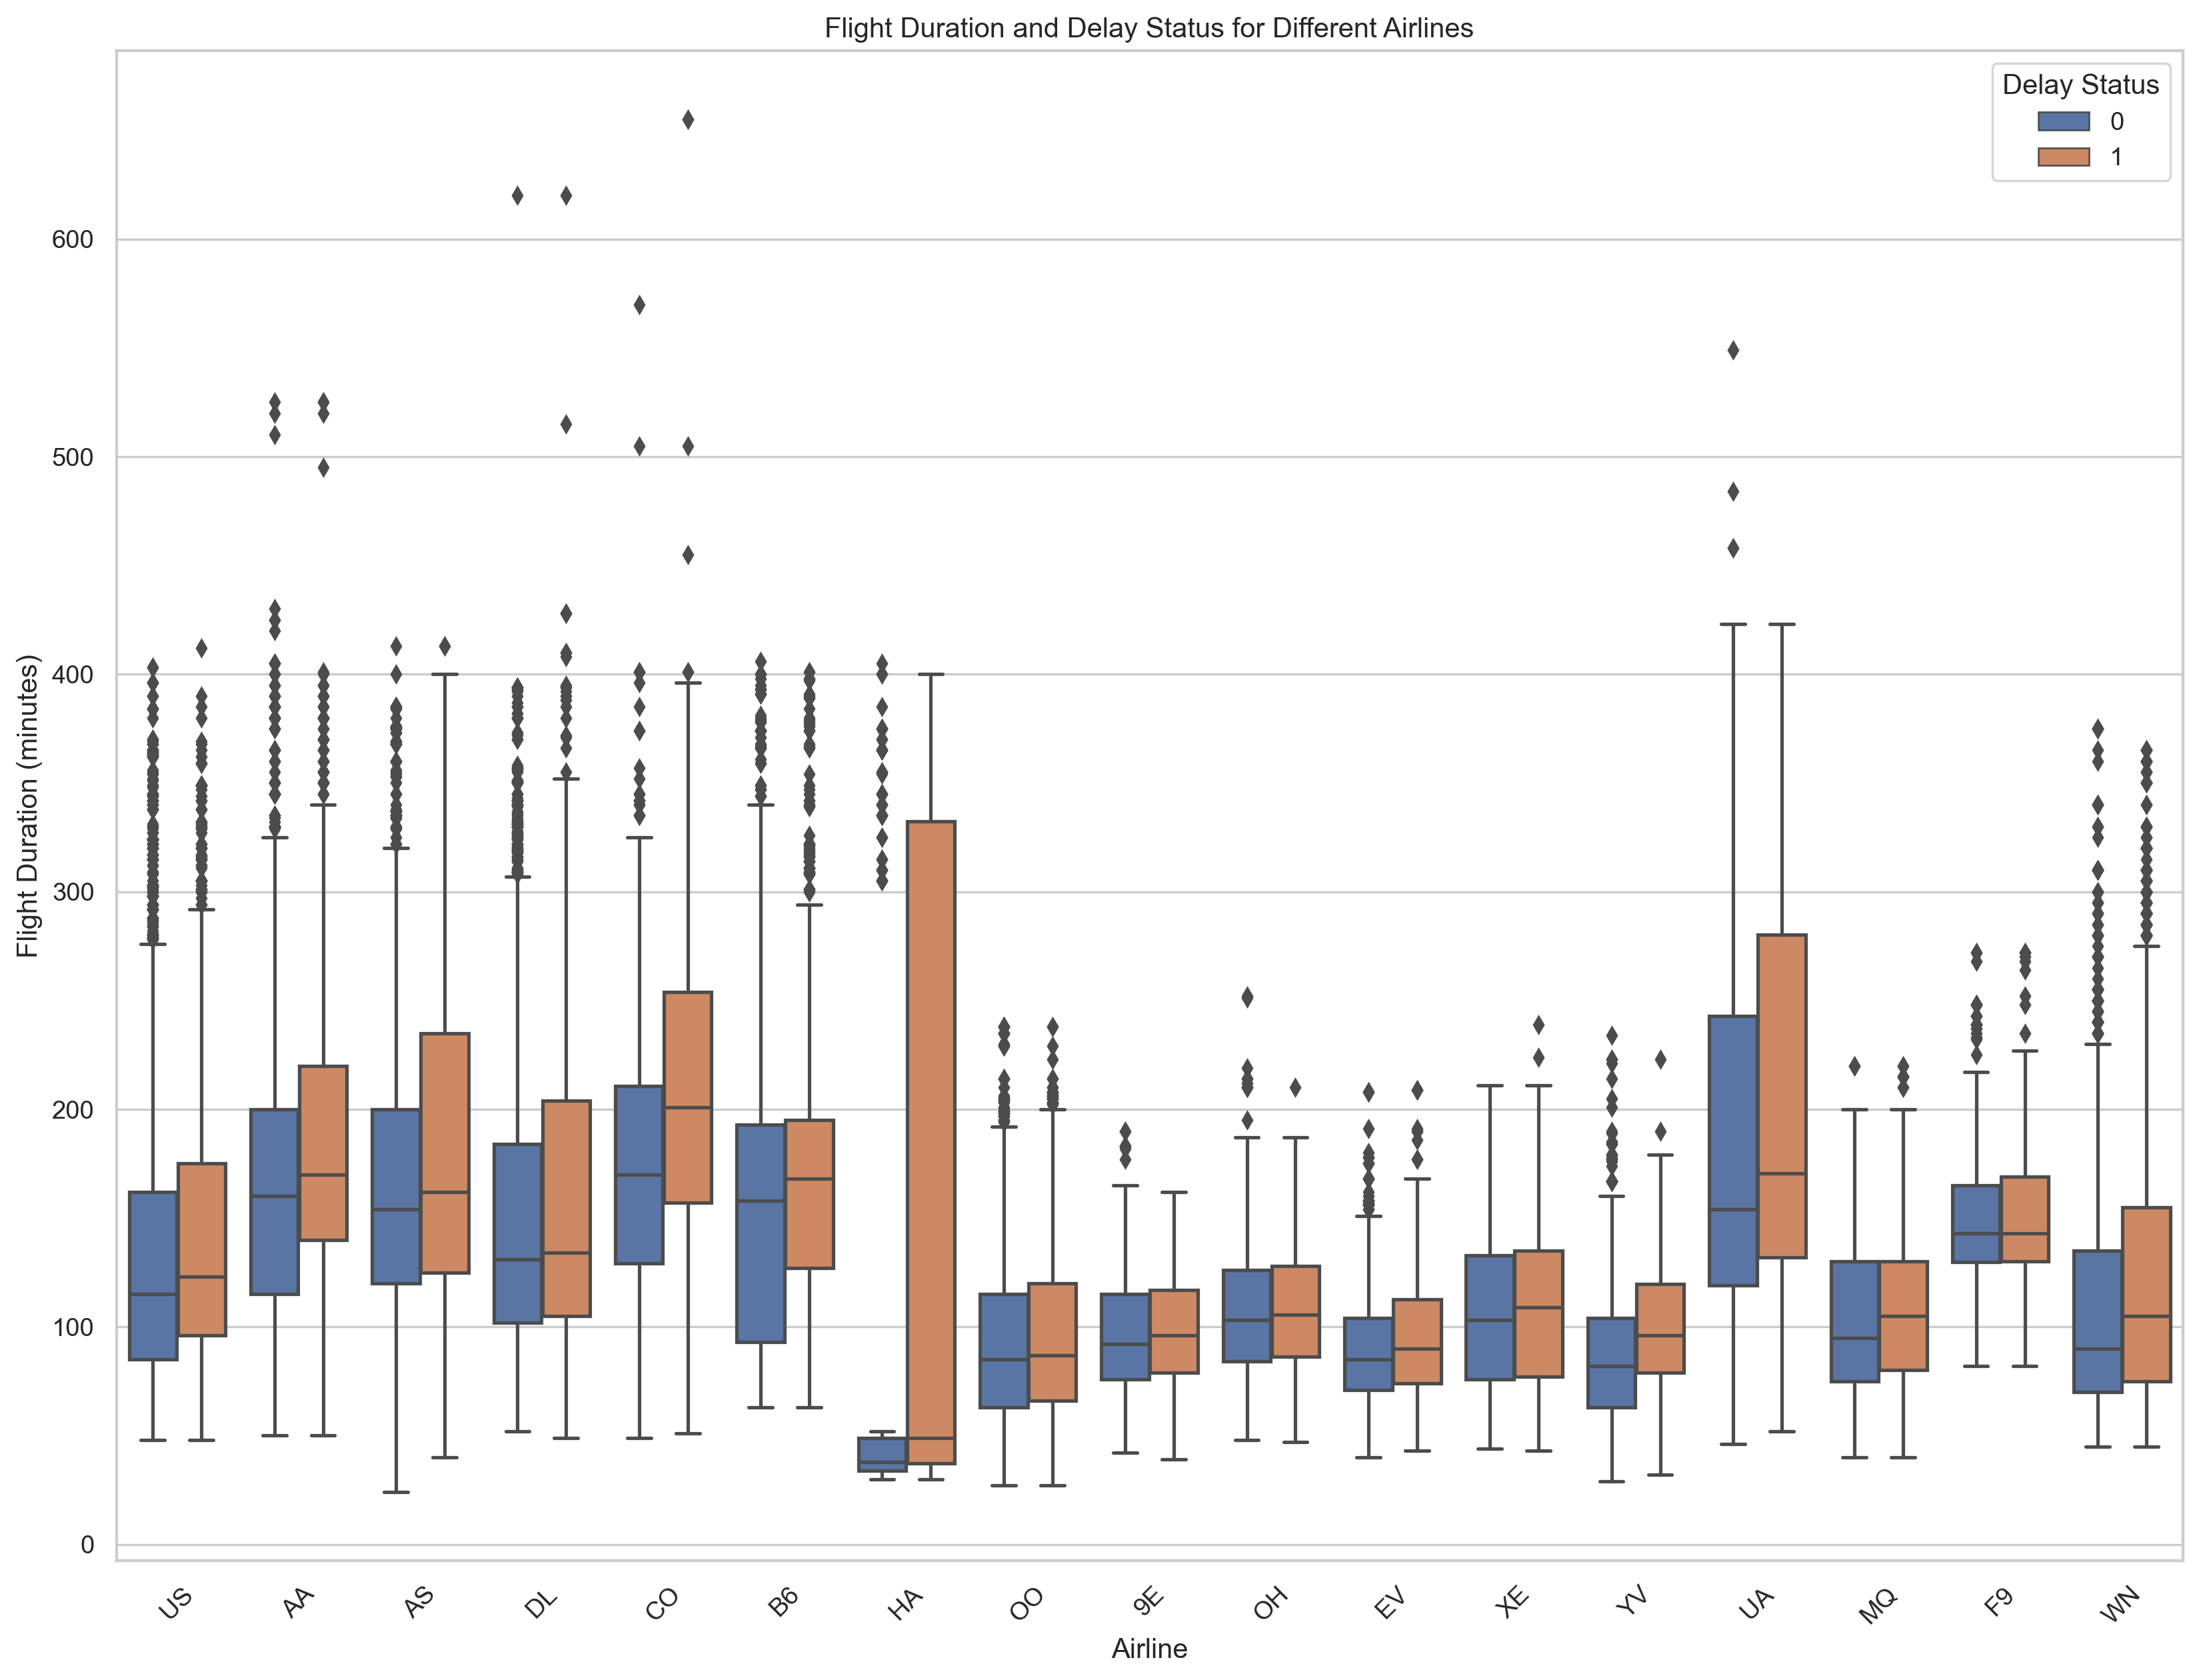

In [41]:
plt.figure(figsize=(16,12),dpi=250)
sns.boxplot(data=df, x='Airline', y='Length', hue='Delay')
plt.title('Flight Duration and Delay Status for Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Flight Duration (minutes)')
plt.legend(title='Delay Status')

plt.xticks(rotation=45)

plt.show()

### 7. Flight delays medium hubs vs large hubs

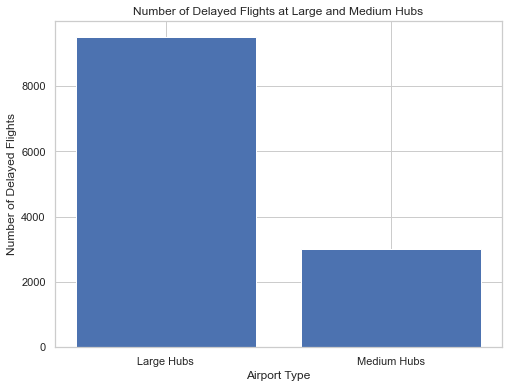

In [42]:
merged_large_hubs = pd.merge(df_large_hubs, df, left_on='Airport', right_on='AirportFrom', how='inner')

merged_medium_hubs = pd.merge(df_medium_hubs, df, left_on='Airport', right_on='AirportFrom', how='inner')

delayed_counts_large_hubs = merged_large_hubs['Delay'].sum()

delayed_counts_medium_hubs = merged_medium_hubs['Delay'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Large Hubs', 'Medium Hubs'], [delayed_counts_large_hubs, delayed_counts_medium_hubs])
plt.xlabel('Airport Type')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights at Large and Medium Hubs')
plt.show()

###### Since there are more flights departing from large hubs so we should also check the proportion of the flights delayed to avoid the bias

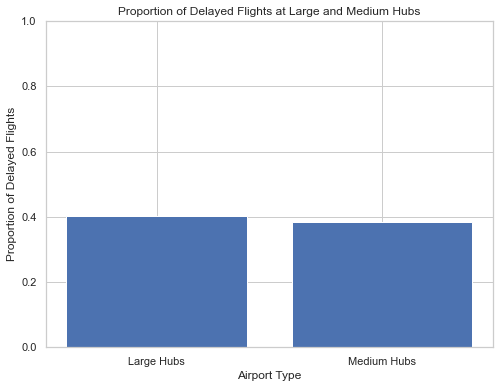

In [43]:
proportion_delayed_large_hubs = merged_large_hubs['Delay'].mean()

proportion_delayed_medium_hubs = merged_medium_hubs['Delay'].mean()


plt.figure(figsize=(8, 6))
plt.bar(['Large Hubs', 'Medium Hubs'], [proportion_delayed_large_hubs, proportion_delayed_medium_hubs])
plt.xlabel('Airport Type')
plt.ylabel('Proportion of Delayed Flights')
plt.title('Proportion of Delayed Flights at Large and Medium Hubs')
plt.ylim(0, 1)  
plt.show()

###### We can see there is not that much difference between them

### 8. Hypothesis testing

#### a. If the airport's altitude has anything to do with flight delays for incoming and departing flights

In [44]:
from scipy.stats import mannwhitneyu

In [45]:
group1 = df[df['Delay'] == 0]['elevation_ft']
group2 = df[df['Delay'] == 1]['elevation_ft']

In [46]:
statistic, p_value = mannwhitneyu(group1, group2)

In [47]:
alpha = 0.05

In [48]:
if p_value < alpha:
    print("The airport's altitude is associated with flight delays (reject H0).")
else:
    print("There is no significant association between the airport's altitude and flight delays (fail to reject H0).")

The airport's altitude is associated with flight delays (reject H0).


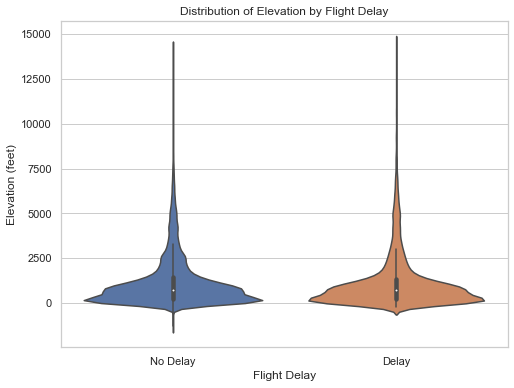

In [49]:
data = pd.DataFrame({'No Delay': group1, 'Delay': group2})

plt.figure(figsize=(8, 6))
sns.violinplot(data=data)
plt.xlabel('Flight Delay')
plt.ylabel('Elevation (feet)')
plt.title('Distribution of Elevation by Flight Delay')
plt.show()

#### If the duration of a flight (length) affects flight delays

In [50]:
grp1 = df[df['Delay'] == 0]['Length']
grp2 = df[df['Delay'] == 1]['Length']


statistic, p_value = mannwhitneyu(grp1, grp2)

alpha = 0.05

if p_value < alpha:
    print("The duration of a flight significantly affects flight delays (reject H0).")
else:
    print("There is no significant association between the duration of a flight and flight delays (fail to reject H0).")

The duration of a flight significantly affects flight delays (reject H0).


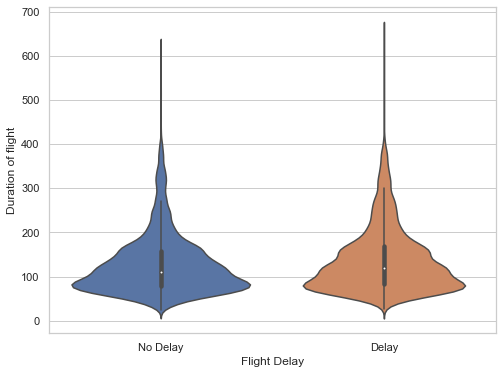

In [51]:
data = pd.DataFrame({'No Delay': grp1, 'Delay': grp2})


plt.figure(figsize=(8, 6))
sns.violinplot(data=data)
plt.xlabel('Flight Delay')
plt.ylabel('Duration of flight')

plt.show()

### 9. Find the correlation matrix between the flight delay predictors, create a heatmap to visualize this

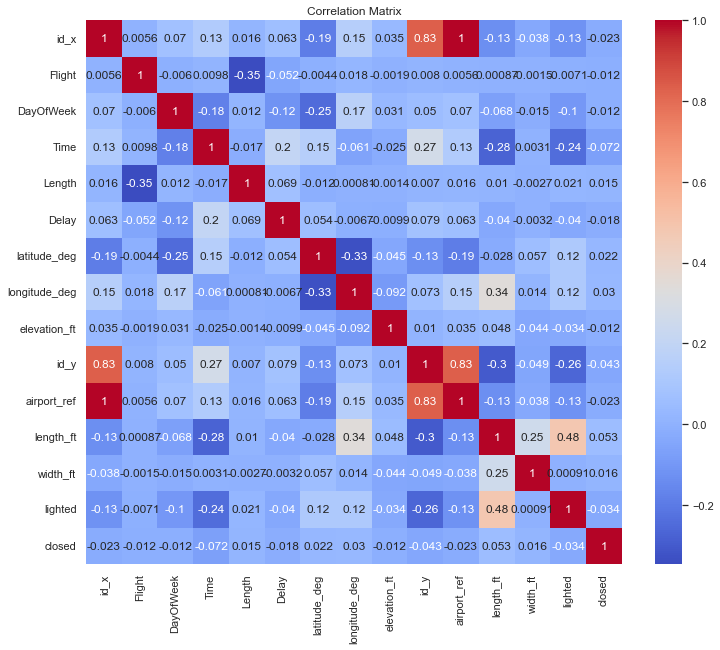

In [52]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 10. Encoding of the categorical variables

In [53]:
df.dtypes

id_x                    int64
Airline                object
Flight                  int64
AirportFrom            object
AirportTo              object
DayOfWeek               int64
Time                    int64
Length                  int64
Delay                   int64
ident                  object
type                   object
name                   object
latitude_deg          float64
longitude_deg         float64
elevation_ft          float64
iso_country            object
iso_region             object
municipality           object
scheduled_service      object
id_y                    int64
airport_ref             int64
airport_ident          object
length_ft             float64
width_ft              float64
surface                object
lighted                 int64
closed                  int64
le_ident               object
DurationCategory     category
dtype: object

###### Since airports are quite important and they in hunderds of numbers so creating dummy variables can give too many columns so instead we can take the mean delay from the different airports

In [54]:
mean_delay_airport_from = df.groupby('AirportFrom')['Delay'].mean()

df['AirportFrom_encoded'] = df['AirportFrom'].map(mean_delay_airport_from)

mean_delay_airport_to = df.groupby('AirportTo')['Delay'].mean()

df['AirportTo_encoded'] = df['AirportTo'].map(mean_delay_airport_to)

df = df.drop(['AirportFrom', 'AirportTo'], axis=1)

###### We can take the same encoding approach with the Airline column

In [56]:
mean_delay_airline = df.groupby('Airline')['Delay'].mean()

df['Airline_encoded'] = df['Airline'].map(mean_delay_airline)

df = df.drop('Airline', axis=1)

In [57]:
df.type.unique()

array(['small_airport', 'large_airport', 'medium_airport', 'closed',
       'heliport', 'seaplane_base', 'balloonport'], dtype=object)

In [58]:
df = pd.get_dummies(df, columns=['type'], prefix='airport_type')

In [59]:
df.DurationCategory.unique()

['Medium', 'Long', 'Short']
Categories (3, object): ['Short' < 'Medium' < 'Long']

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['DurationCategory_encoded'] = encoder.fit_transform(df['DurationCategory'])

##### Dropping the columns that we don't need

In [61]:
columns_to_drop = ['id_x', 'Flight', 'ident', 'name', 'iso_country', 'iso_region', 'municipality', 'id_y', 'airport_ref', 'airport_ident', 'surface', 'le_ident','DurationCategory']
df = df.drop(columns=columns_to_drop)

In [62]:
df.head()

,DayOfWeek,Time,Length,Delay,latitude_deg,longitude_deg,elevation_ft,scheduled_service,length_ft,width_ft,...,AirportTo_encoded,Airline_encoded,airport_type_balloonport,airport_type_closed,airport_type_heliport,airport_type_large_airport,airport_type_medium_airport,airport_type_seaplane_base,airport_type_small_airport,DurationCategory_encoded
0,3,15,222,1,24.526793,54.974812,88.0,no,7080.0,200.0,...,0.274066,0.315594,0,0,0,0,0,0,1,1
1,3,20,165,1,-9.428000,160.054993,28.0,yes,7218.0,148.0,...,0.237168,0.338191,0,0,0,1,0,0,0,1
2,3,20,195,1,-8.327970,157.263000,10.0,yes,4593.0,98.0,...,0.237168,0.338191,0,0,0,0,1,0,0,1
3,3,30,202,0,40.085383,20.153890,666.0,no,3855.0,228.0,...,0.420339,0.267052,0,0,0,0,0,0,1,1
4,3,30,220,0,40.294102,44.564602,4416.0,no,3281.0,250.0,...,0.301337,0.358653,0,0,0,0,0,0,1,1


In [63]:
df.dtypes

DayOfWeek                        int64
Time                             int64
Length                           int64
Delay                            int64
latitude_deg                   float64
longitude_deg                  float64
elevation_ft                   float64
scheduled_service               object
length_ft                      float64
width_ft                       float64
lighted                          int64
closed                           int64
AirportFrom_encoded            float64
AirportTo_encoded              float64
Airline_encoded                float64
airport_type_balloonport         uint8
airport_type_closed              uint8
airport_type_heliport            uint8
airport_type_large_airport       uint8
airport_type_medium_airport      uint8
airport_type_seaplane_base       uint8
airport_type_small_airport       uint8
DurationCategory_encoded         int32
dtype: object

In [64]:
df.scheduled_service.unique()

array(['no', 'yes'], dtype=object)

In [65]:
df['scheduled_service_encoded'] = encoder.fit_transform(df['scheduled_service'])

In [66]:
df= df.drop(['scheduled_service'],axis=1)

### 11. Model Building

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop('Delay', axis=1)
y = df['Delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Keep 10% of the data for final prediction (prediction set)
X_prediction, X_train_final, y_prediction, y_train_final = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


##### Pipeline for logistic regression with standardization and for decision tree classifier

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log', random_state=42))
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

##### Set up the stratified five-fold cross-validation

In [70]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

##### Perform cross-validation and evaluate logistic regression model

In [71]:
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
logreg_mean_score = logreg_scores.mean()
logreg_std_score = logreg_scores.std()


##### Perform cross-validation and evaluate decision tree classifier model

In [72]:
dt_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
dt_mean_score = dt_scores.mean()
dt_std_score = dt_scores.std()

###### Printing the results

In [73]:
print("Logistic Regression:")
print(f"Mean Accuracy: {logreg_mean_score:.4f}")
print(f"Standard Deviation: {logreg_std_score:.4f}")
print("\nDecision Tree Classifier:")
print(f"Mean Accuracy: {dt_mean_score:.4f}")
print(f"Standard Deviation: {dt_std_score:.4f}")

Logistic Regression:
Mean Accuracy: 0.6769
Standard Deviation: 0.0102

Decision Tree Classifier:
Mean Accuracy: 0.6719
Standard Deviation: 0.0082


##### Using RandomizedSearchCV for hyperparameter tuning, and use k-fold for crossvalidation

In [74]:
from sklearn.model_selection import RandomizedSearchCV

logreg_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


logreg_random_search = RandomizedSearchCV(logreg_pipeline, logreg_param_grid, cv=cv, scoring='accuracy', n_iter=10, random_state=42)
logreg_random_search.fit(X_train, y_train)


dt_random_search = RandomizedSearchCV(dt_pipeline, dt_param_grid, cv=cv, scoring='accuracy', n_iter=10, random_state=42)
dt_random_search.fit(X_train, y_train)


print("Best Hyperparameters for Logistic Regression:")
print(logreg_random_search.best_params_)

print("\nBest Hyperparameters for Decision Tree Classifier:")
print(dt_random_search.best_params_)

Best Hyperparameters for Logistic Regression:
{'classifier__penalty': 'l2', 'classifier__alpha': 0.1}

Best Hyperparameters for Decision Tree Classifier:
{'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10, 'classifier__criterion': 'gini'}


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logreg_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
# Logistic Regression evaluation
logreg_pred = logreg_pipeline.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

# Decision Tree evaluation
dt_pred = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("Logistic Regression Performance:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)
print()
print("Decision Tree Performance:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)

Logistic Regression Performance:
Accuracy: 0.6702560735390676
Precision: 0.5766208251473477
Recall: 0.4158696422245838
F1 Score: 0.4832270014406256

Decision Tree Performance:
Accuracy: 0.6836506894287591
Precision: 0.5716759002770083
Recall: 0.5848388239461566
F1 Score: 0.578182454911574


##### Using the stratified five-fold method to build and validate the models using the XGB classifier

In [76]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb_classifier = xgb.XGBClassifier(random_state=42)

# Perform stratified five-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over the folds
for train_index, test_index in skf.split(X, y):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

print("XGB Classifier Performance:")
print("Accuracy:", avg_accuracy)
print("Precision:", avg_precision)
print("Recall:", avg_recall)
print("F1 Score:", avg_f1)

XGB Classifier Performance:
Accuracy: 0.7260978661659475
Precision: 0.6868035983629885
Recall: 0.5119006725322233
F1 Score: 0.5865218799103321


### 12. Comparing all the models

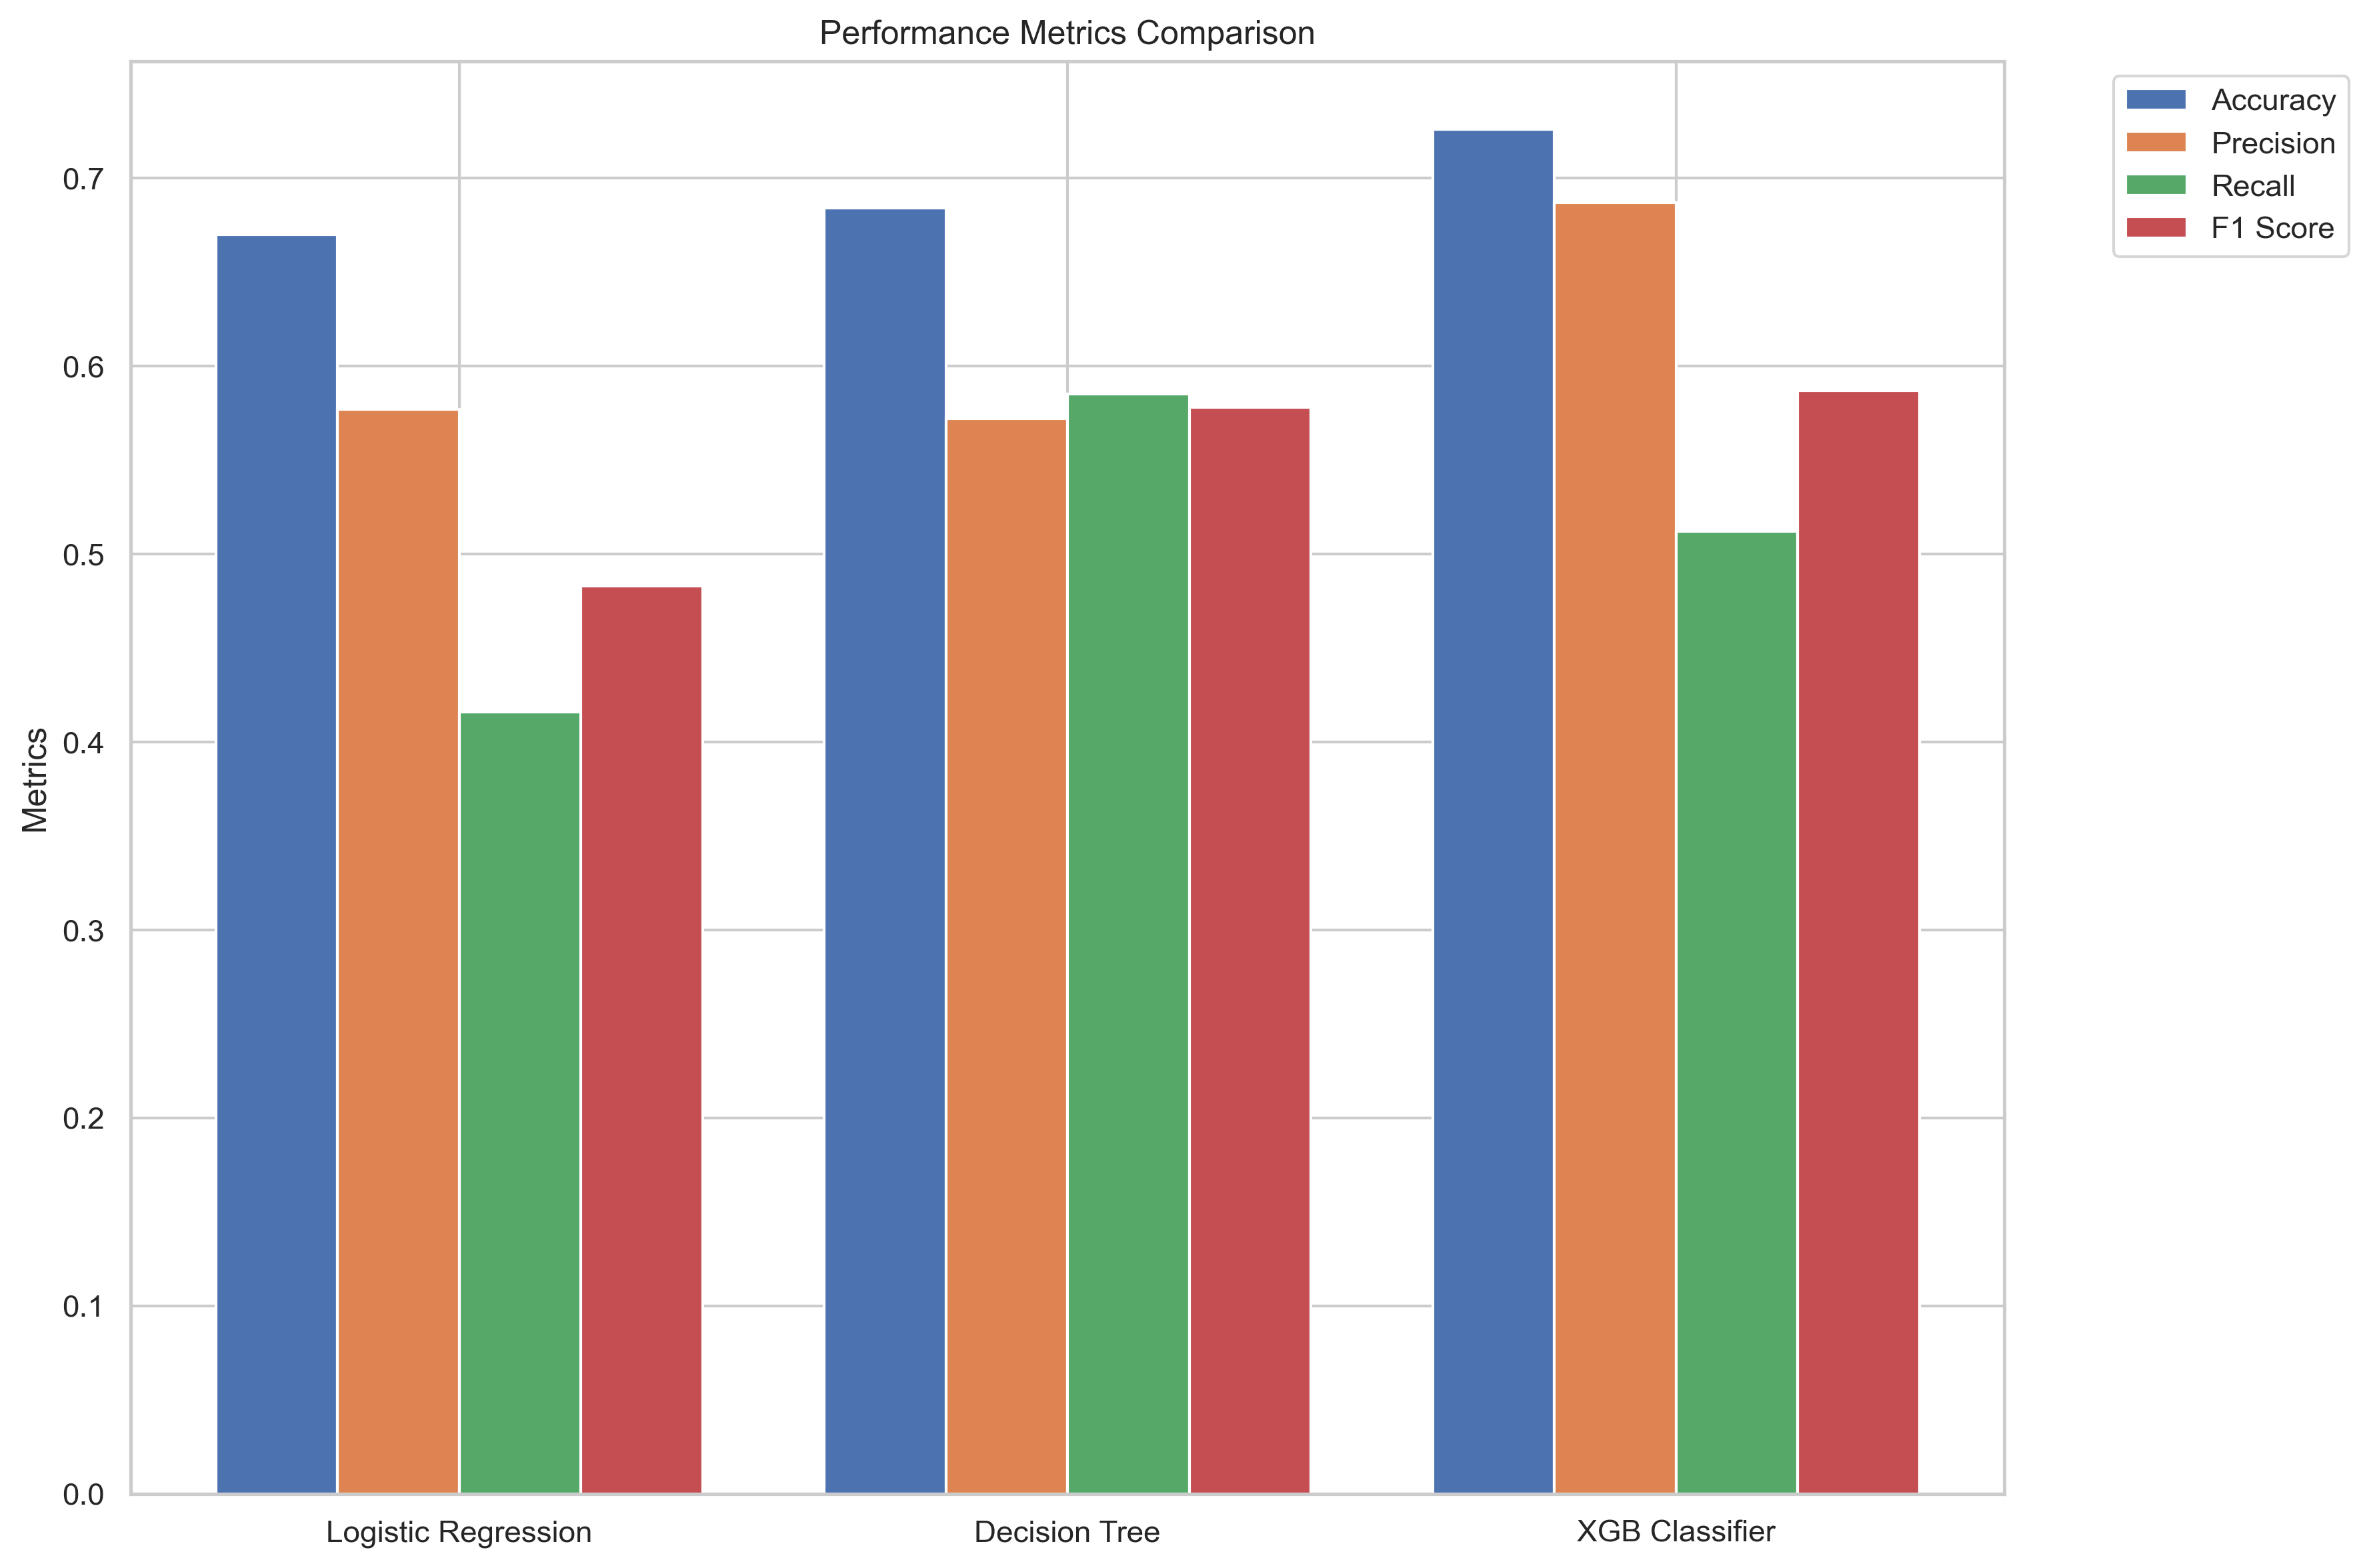

In [77]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression', 'Decision Tree', 'XGB Classifier']

accuracy = [0.670, 0.684, 0.726]
precision = [0.577, 0.572, 0.687]
recall = [0.416, 0.585, 0.512]
f1_score = [0.483, 0.578, 0.587]

x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12,8),dpi=300)
ax.bar(x, accuracy, width, label='Accuracy')
ax.bar([i + width for i in x], precision, width, label='Precision')
ax.bar([i + 2*width for i in x], recall, width, label='Recall')
ax.bar([i + 3*width for i in x], f1_score, width, label='F1 Score')

ax.set_xticks([i + 1.5*width for i in x])
ax.set_xticklabels(models)

ax.set_ylabel('Metrics')

ax.set_title('Performance Metrics Comparison')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


#### We can see that XGB Classifier provides the best performance